# Machine learning - Assignment 1 - Data preprocessing and manual introspection
____
**Author**: Kemal Cikota

**Course**: Machine learning
____

### Introduction

In this assignment, we were tasked with performing simple linear regression on different variables in the Boston housing market dataset. We would then extrapolate this linear regression method on several variables and in the end combine all of the variables in the same linear regression model. Conclusions and interpretations of the outputs will also be made in this notebook to make it clearer as to how and why certain calculations are computed and what their results indicate.

### Load the data and get an overview of the data

Like in the last assignment, we need to import all of our libraries, load the dataset and call some functions/commands in order to get an overview of the data. At this stage, a lot of code was reused from my A1 submission so thats why some commments and lines of code will look similar.

In [2]:
import pandas as pd # Never coded in R before but this seems to be the equivalent of library(pandas) in R
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

# load boston.csv
boston = pd.read_csv('Boston.csv')

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

Once the dataset is loaded, we can display the number of predictors (variables/columns) and their names.

In [3]:
# This will print '15' and not '14' because it counts the first 'empty' column
numFeatures = boston.shape[1]
print(numFeatures)

featureNames = boston.columns.tolist()
print(featureNames, end="\n\n")


15
['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']



We can now print a statistic summary of the whole dataset, using the 'describe' function which is similar to 'summary' in R.

In [4]:
print(boston.describe(), end="\n\n")


       Unnamed: 0        crim          zn       indus        chas         nox  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   253.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
std    146.213884    8.601545   23.322453    6.860353    0.253994    0.115878   
min      1.000000    0.006320    0.000000    0.460000    0.000000    0.385000   
25%    127.250000    0.082045    0.000000    5.190000    0.000000    0.449000   
50%    253.500000    0.256510    0.000000    9.690000    0.000000    0.538000   
75%    379.750000    3.677083   12.500000   18.100000    0.000000    0.624000   
max    506.000000   88.976200  100.000000   27.740000    1.000000    0.871000   

               rm         age         dis         rad         tax     ptratio  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     6.284634   68.574901    3.795043    9.549407  408.237154   18.455534   
std      0.702617   28.1488

We can now also print all of the datapoints in this dataset.

In [5]:
print("total amount of datapoints: ", boston.shape[0], end="\n\n")

total amount of datapoints:  506



At this stage, we have quite a good idea at how the data looks like. I did also find a good [source](https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset) online that explains the dataset in further detail. The most important part for me was just to get an idea of what the columns actually mean which is important for the interpretation later.

However, now when we have a good overview, we can now plot some predictors against some response values using linear regression. For this, i decided to use the same variables as the example, which was lstat, rm and age.

At this stage i will plot the scatter plots with a linear regression line, confidence interval and correlation coefficient.

Correlation coefficient between medv and lstat:  -0.7376627261740147 , with p-value:  5.081103394387547e-88
Correlation coefficient between medv and rm:  0.6953599470715394 , with p-value:  2.4872288710071593e-74
Correlation coefficient between medv and age:  -0.37695456500459623 , with p-value:  1.5699822091877261e-18



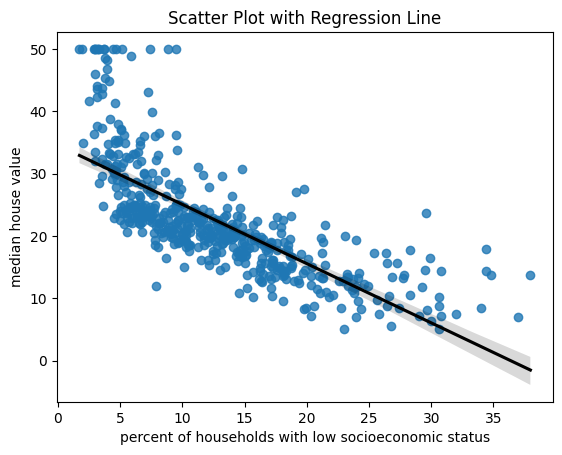

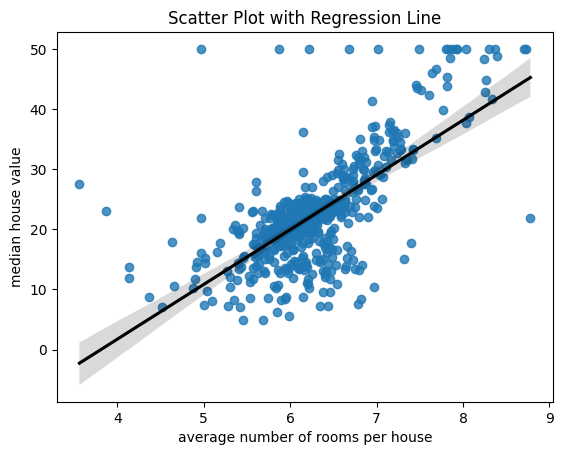

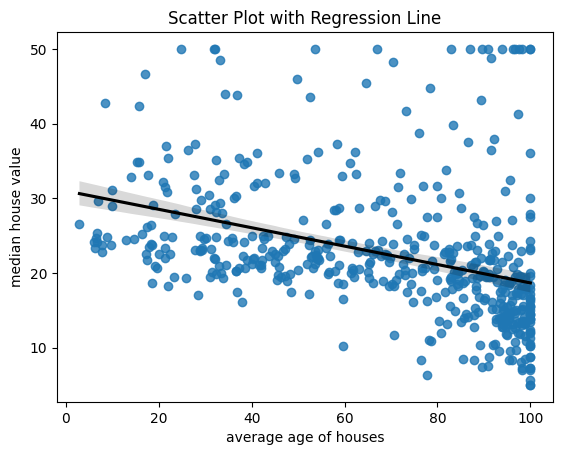

In [6]:

# correlation coefficients between our variables for the 3 plots
corCoef_medv_lstat, pValue_medv_lstat = stats.pearsonr(boston['medv'], boston['lstat'])
print("Correlation coefficient between medv and lstat: ", corCoef_medv_lstat, ", with p-value: ", pValue_medv_lstat)

corCoef_medv_lstat, pValue_medv_rm = stats.pearsonr(boston['medv'], boston['rm'])
print("Correlation coefficient between medv and rm: ", corCoef_medv_lstat, ", with p-value: ", pValue_medv_rm)

corCoef_medv_lstat, pValue_medv_age = stats.pearsonr(boston['medv'], boston['age'])
print("Correlation coefficient between medv and age: ", corCoef_medv_lstat, ", with p-value: ", pValue_medv_age, end="\n\n")

# Scatter plot with regression line between lstat and medv
sns.regplot(x=boston['lstat'], y=boston['medv'],  line_kws={'color': 'black'})

# Add labels to the plot
plt.xlabel("percent of households with low socioeconomic status")
plt.ylabel("median house value")
plt.title(f"Scatter Plot with Regression Line")
plt.show() # Remember to make the window bigger to see the plot

# Scatter plot with regression line between rm and medv
sns.regplot(x=boston['rm'], y=boston['medv'],  line_kws={'color': 'black'})

# Add labels to the plot
plt.xlabel("average number of rooms per house")
plt.ylabel("median house value")
plt.title(f"Scatter Plot with Regression Line")
plt.show()

# Scatter plot with regression line between age and medv
sns.regplot(x=boston['age'], y=boston['medv'],  line_kws={'color': 'black'})

# Add labels to the plot
plt.xlabel("average age of houses")
plt.ylabel("median house value")
plt.title(f"Scatter Plot with Regression Line")
plt.show()


### Perform simple linear regressions

Now when we have a good overview of the data, and also plotted some regression plots with correlation coefficients. We can not go ahead and fit theese simple linear regression models with medv as the response value with some other variables. I will keep using the lstat, rm and age variables as predictors.

I can fit the models using the statsmodels.OLS package and from that print the statistical summary. However, the built in summary doesent include the residuals so i used the .resid function from the same package in order to print the residuals to make it as similar as possible to the example.

In [7]:

model_lstat_medv = sm.OLS(boston['medv'], sm.add_constant(boston['lstat'])).fit()
residuals_model_lstat_medv = model_lstat_medv.resid

print("Residuals: ", residuals_model_lstat_medv.describe(), end="\n\n") # we need to add this because sm.OLS doesent include the residuals in the summary
print(model_lstat_medv.summary())



model_rm_medv = sm.OLS(boston['medv'], sm.add_constant(boston['rm'])).fit()
residuals_model_rm_medv = model_rm_medv.resid

print("Residuals: ", residuals_model_rm_medv.describe(), end="\n\n") # we need to add this because sm.OLS doesent include the residuals in the summary
print(model_rm_medv.summary())



model_age_medv = sm.OLS(boston['medv'], sm.add_constant(boston['age'])).fit()
residuals_model_age_medv = model_age_medv.resid

print("Residuals: ", residuals_model_age_medv.describe(), end="\n\n") # we need to add this because sm.OLS doesent include the residuals in the summary
print(model_age_medv.summary())


Residuals:  count    5.060000e+02
mean     3.521821e-14
std      6.209603e+00
min     -1.516745e+01
25%     -3.989612e+00
50%     -1.318186e+00
75%      2.033701e+00
max      2.450013e+01
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           5.08e-88
Time:                        11:01:40   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
      

### Interpretation of results

Lets first try to understand what is actually being calculated at this stage and explain some of the terminologies, this is where the [source](https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset) i cited earlier will be very helpfull.

A _response variable_, in this case **medv**, is the dependent variable in the regression mode and it represents the outcome that we are trying to predict or explain using our desired model. In this case, **medv** means, the median house value in 1000's of dollars.

A _predictor variable_, in this case **lstat (percentege of households with low socioeconomic status)**, **rm (average number of rooms per house)** and **age (Proportion of owner occupied units built before 1940)**, are independent variables used to predict the response. In this analysis, i am essentially trying to understand how each predictor variable individually influences **medv**.

From the data that was gathered, i will create my own summary that extracts the key findings from the experiment. I have ranked theese based on the highest R-squared values.

| Variables    | R^2   | Coefficient | P-value   |
|--------------|-------|-------------|-----------|
| medv ~ lstat | 0.544 | -0.950      | P < 0.001 |
| medv ~ rm    | 0.484 | 9.102       | P < 0.001 |
| medv ~ age   | 0.142 | -0.123      | P < 0.001 |

So, as we can see, **lstat** explains 54.4% of the variability in medv. We can also conclude from the coefficient that for each 0.95% increase in the percentage of low socioeconomic households, the median house value decreases by approximately $950.

**rm** explains 48.4% of the variability in medv. From the coefficient we can see that for each additional room in the house, the median house value increases by about $9102.

**age** explains 14.2% of the variability in medv. From the coefficient we can see that for every 1% increase in the proportion of older houses, the median house value decreases by about 123$.


Because **lstat** has the highest R^2 value, we can conclude that **lstat** has the strongest negative influence on house prices. This is followed by **rm** which has a strong positive influence. **age** also negatively affects house prices but has a much weaker relationship. All of theese relationships have a P-value of P < 0.001 which indicates that all of the predictors are statistically significant to the response variable.

From a practical standpoint, this could indicate that stakeholders that have an interest in housing policies such as governmental bodies, banks and credit unions should prioritize socioeconomic factors and house sizes over the age of homes when estimating or influencing house prices when doing market analysies.

Up next, we now have to obtain a confidence interval for the coefficient estimates for the individual models.

In [9]:

# Confidence intervals for the coefficients from the model with lstat
conf_lstat_medv = model_lstat_medv.conf_int()
conf_lstat_medv.columns = ['2.5%', '97.5%'] # trying to make it look like the example by adding labels
conf_lstat_medv.index = ['(Intercept)', 'lstat (slope)']
print("Confidence interval for lstat: ")
print(conf_lstat_medv, end="\n\n")

# Confidence intervals for the coefficients from the model with rm
conf_rm_medv = model_rm_medv.conf_int()
conf_rm_medv.columns = ['2.5%', '97.5%'] # trying to make it look like the example by adding labels
conf_rm_medv.index = ['(Intercept)', 'rm (slope)']
print("Confidence interval for rm: ")
print(conf_rm_medv, end="\n\n")

# Confidence intervals for the coefficients from the model with age
conf_age_medv = model_age_medv.conf_int()
conf_age_medv.columns = ['2.5%', '97.5%'] # trying to make it look like the example by adding labels
conf_age_medv.index = ['(Intercept)', 'age (slope)']
print("Confidence interval for age: ")
print(conf_age_medv, end="\n\n")

Confidence interval for lstat: 
                    2.5%      97.5%
(Intercept)    33.448457  35.659225
lstat (slope)  -1.026148  -0.873951

Confidence interval for rm: 
                  2.5%      97.5%
(Intercept) -39.876641 -29.464601
rm (slope)    8.278855   9.925363

Confidence interval for age: 
                  2.5%      97.5%
(Intercept)  29.015752  32.941604
age (slope)  -0.149647  -0.096679



A confidence interval provides a range of values for the coefficient estimates where we are 95% confident that the true population parameter lies. If the range doesent include 0, the predictor is statistically significant.

The confidence interval for **lstat** show that we have a range for the intercept of [33.448 - 35.659] which means that if **lstat** would be 0 (meaning we have no low socioeconomic households in a given area), the house value is predicted to be between $33448 and $35659. The slope for lstat falls in the range [-1.026 - -0.874] which means that for every 1% increse in low socioeconomic households in a given neighborhood, the median house value will decrease by $874-$1026

The confidence interval for **rm** show that we have a range for the intercept of [-39.877 - -29.465] which means that if a room would have 0 rooms, the median house value would be negative. This specific piece of information isnt that meaningfull but could reflect extrapolation. The slope, however, is more meaningfull as it falls in the range [8.279 - 9.925] which means that for every additional room, the median house value increases by $8279-$9925 .

The confidence interval for **age** show that we have a range for the intercept of [29.016 - 32.942] which means that if **age** would be 0 (brand new), the median house value would be predicted to be between $29016-$32942. The slope for **age** falls in the range [-0.150 - -0.097] which means that for every 1% increase in the proportion of older houses, the median house value decreases by $97-$150.

All of theese confidence intervals dont include 0 in the ranges so we know that all of them are statistically signifcant.

### Use the simple linear regression models

